# Project: Investigate a Dataset (No-show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project this dataset collects information from 100k medical appointments in Brazil provided on (Kaggle)
and is focused on the question of whether or not patients show up for their appointment.
And the mean question that should we find the answer about is what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

## Questions
- What is the total percentage of no show ?
- Are no-show appointments associated with a certain gender?
- How is age affecting the patient's absence?
- Is scholarship a factor in decreasing the number of absences?
- Is alcoholism a prominent factor in patient's absences? 
- Do SMS reminders decrease the number of absences?


In [123]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In the next step I'm going to assess the dataset by some of the assessment methods to building intuition about a dataset and check if some data need to be cleaned.

### General Properties

In [124]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [125]:
# Dataset shape (check the numbers of samples(rows) and columns)
df.shape

(110527, 14)

In [126]:
# Checking the dataset data types of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [127]:
# Dataset info (checking whether there is a missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [128]:
# Checking the number of unique values in each column of the dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [129]:
# Checking whether there is a duplicate rows in the dataset
sum(df.duplicated())

0

In [130]:
# View a basic statistic about the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### According to the previous assessing in the next step I'm going to clean and fixe some points of the data.

- Change the data type of (PatientId) column to integer as I think it should include only integer numbers not float.
- Change the data type of (ScheduledDay & AppointmentDay) columns to datetime instead of object as they includes dates and times.
- Use the datype method again to insure that the data types of the mentioned columns have been changed successfuly.
- Rename the following columns to be more clear and understode (PatientId, AppointmentID, ScheduledDay, AppointmentDay, Neighbourhood, Handcap, No-show).
- As apeared in the describtion above the min age is (-1), so I will drop any rows contain (-1 in age) because it's an invalid data.
- Chech how many rows contain (-1) under age column by query function then drop the row/s by drop method.
- Use query function again to insure that there is no any row with (-1) under the age column.

### Data Cleaning (Replace this with more specific notes!)

In [131]:
# Changing the data type of the (PatientId) column to integer instead of float
df['PatientId'] = df['PatientId'].astype(int)
df['PatientId'].dtypes

dtype('int64')

In [132]:
# Changing the data type of the (Scheduled_Day & Appointment_Day) columns to datetime instead of string
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [133]:
# Confirm that the changes have been done
df.dtypes

PatientId                  int64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [134]:
# Rename some columns of dataset
df.rename(columns={'PatientId':'Patient_ID','AppointmentID':'Appointment_ID','ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day','Neighbourhood':'Hospital_location', 'Handcap':'Handicap', 'No-show':'No_show'}, inplace=True)
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Hospital_location,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [135]:
# As appeared in the basic statistic there is a (-1) value in the age column, (chechking all (-1) values in age column)
df.query('Age == "-1"')

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Hospital_location,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [136]:
# Remove this row that include invalid age value
df.drop([99832], inplace=True)

In [137]:
# Confirm that it has been removed
df.query('Age == "-1"')

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Hospital_location,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What is the overall percentage of show and no-show patients?)

AxesSubplot(0.125,0.125;0.775x0.755)


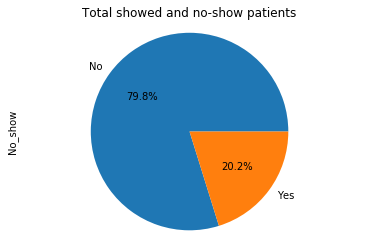

In [138]:
# Count the total number of showed and no show patients and create a pie chart to visualize the total percentages
total = df['No_show'].value_counts().plot(kind='pie',autopct='%1.1f%%');
print(total)
plt.title ('Total showed and no-show patients')
plt.axis('equal')
plt.show()

#### Result: Overall (110526) patients there are 79.8% showed and 20.2% no show.

### Research Question 2 (Is there is a relationship between the gender and no showing ?)

In [139]:
# Exploring the relation between the gender and not showing
df.groupby(["Gender", "No_show"]).size()

Gender  No_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
dtype: int64

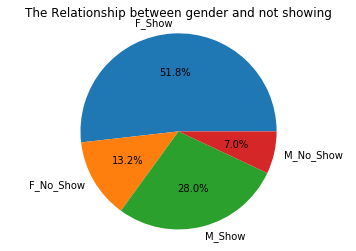

In [140]:
# Creat a pie chart according to the result (Relationship between gender and not showing)
labels = 'F_Show', 'F_No_Show', 'M_Show', 'M_No_Show'
Results = [57245, 14594, 30961, 7725]

plt.pie(Results, labels=labels, autopct='%1.1f%%')
plt.title ('The Relationship between gender and not showing')
plt.axis('equal')
plt.show()

#### Result:
- Overall (71.839) female patients there are 51.8% showed and 13.2% no show. 
- And overall (38.687) male patients there are 28% showed and 7% no show.
- So the total result is 19.9% no show of males and 20.3% no show of females 
- (Males showed up 1% more than the females).


### Research Question 3 (Is there a relation between the no show and the age of the patient)?

In [141]:
# Create a group of ages to summarize the patients into some groups of ages
def Ages_re (Age):
    if Age <= 20:
        return 1
    elif Age <= 40 > 20:
        return 2
    elif Age <= 60 > 40:
        return 3
    elif Age <= 80 > 60:
        return 4
    elif Age >=80:
        return 5
df['Ages_re'] = df.apply(lambda x: Ages_re(x['Age']), axis=1)

In [142]:
# Print the head to make sure that the new column (Ages_re) has been created successfully
df.head(1)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Hospital_location,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Ages_re
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4


In [144]:
# Exploring the relation between patients age groups and show or not show
df.groupby(['Ages_re', 'No_show']).size()

Ages_re  No_show
1        No         24752
         Yes         7096
2        No         22209
         Yes         6626
3        No         24490
         Yes         5591
4        No         14373
         Yes         2537
5        No          2383
         Yes          469
dtype: int64

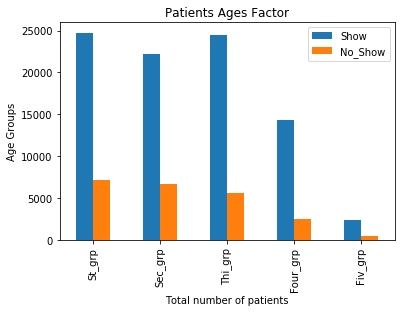

In [145]:
# Create a bar chart to visualize the relation between patients age groups and show or not show percentage
Age_viz = pd.DataFrame({"Show": [24752, 22209,24490, 14373,2383], "No_Show": [7096,6626, 5591,2537,469 ]}, 
                      index=["St_grp", "Sec_grp", "Thi_grp", "Four_grp", "Fiv_grp"])
Age_viz.plot(kind="bar")
plt.title ('Patients Ages Factor')
plt.xlabel ('Total number of patients')
plt.ylabel('Age Groups')
plt.legend()

#### Result: 
- 28% of patients are in the first group of age (0 to 20) years old which is the most and 27% are in the third group of age (40 to 60) years old.
- 2.6% of patients are in the fifth group (80 years old or more).
- The highest percentage of no shows are in first (0-20) & second groups (20-40). 
- The lowest percentage of no shows are in the fourth group (60-80).
- So patients in the fourth group (60-80) show up more than the other patients.

### Research Question 4 (What is the most common hospital location)?

In [146]:
# Find the most common location of the hospitals 
df['Hospital_location'].mode()

0    JARDIM CAMBURI
dtype: object

#### Result: The most common hospital location is (JARDIM CAMBURI).

### Research Question 5 (Which patients showed up more, who have a scholarship or not ?)

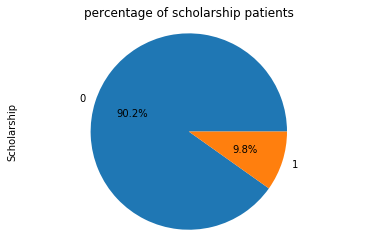

In [147]:
# Check the percentage of patients who have scholarship and who don't
df['Scholarship'].value_counts().plot(kind='pie',autopct='%1.1f%%');
plt.title ('percentage of scholarship patients')
plt.axis('equal')
plt.show()

#### Result: 9.8% of the patients have scholarships.

In [148]:
# Exploring the relation between patients who have scholarship and show or not show
df.groupby(['Scholarship', 'No_show']).size()

Scholarship  No_show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
dtype: int64

In [149]:
# Creat a bar chart of the relationship between patients who have scholarship and show or not show
df.groupby(['Scholarship', 'No_show']).size()

Scholarship  No_show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
dtype: int64

#### Result:
- 23.7% of patients who have scholarships are no show.
- 19.8% of patients who don’t have a scholarship are no show.
- So patients who don’t have scholarships showed up 4% more than those who have scholarships.


### Research Question 6  (Are the alcoholic patients not show more than the not alcoholic patients ?)

In [150]:
# Exploring the relation between alcoholic & not alcoholic patients and not show
df.groupby(["Alcoholism", "No_show"]).size()

Alcoholism  No_show
0           No         85524
            Yes        21642
1           No          2683
            Yes          677
dtype: int64

#### Result: 3% of the patients are alcoholic.

Text(0.5,1,'Alcoholic Patients')

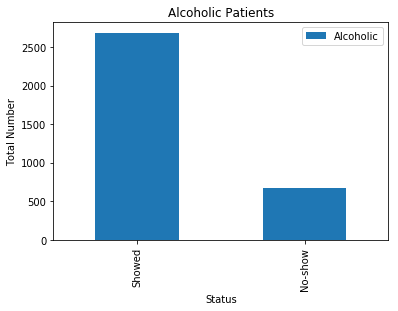

In [151]:
# Creat a bar chart of the total numbers of showed and not showed alcoholic patients
Al_bar = pd.DataFrame({"Alcoholic": [2683, 677]}, 
                      index=["Showed", "No-show"])
Al_bar.plot(kind='bar');
plt.xlabel("Status")
plt.ylabel("Total Number")
plt.title ('Alcoholic Patients')

Text(0.5,1,'Not Alcoholic Patients')

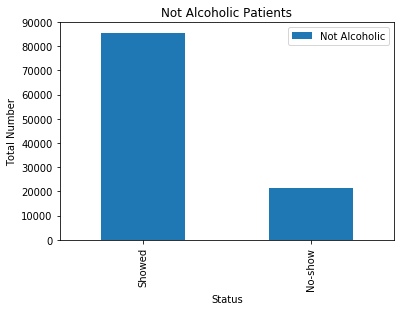

In [152]:
# Creat a bar chart of the total numbers of showed and not showed not alcoholic patients
Free_bar = pd.DataFrame({"Not Alcoholic": [85524, 21642,]}, 
                      index=["Showed", "No-show",])
Free_bar.plot(kind='bar');
plt.xlabel("Status")
plt.ylabel("Total Number")
plt.title ('Not Alcoholic Patients')

#### Result: There is no obvious difference in percentages between the no show whether alcoholic or not alcoholic patient (It almost the same percentage of no show).

### Research Question 7  (Which patients showed up more, who received SMS or not? )

SMS_received  No_show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
dtype: int64


Text(0.5,1,'Showed up patients')

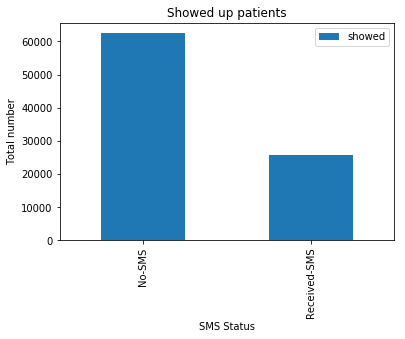

In [153]:
# Exploring the relation between SMS receiving and patients show or not show
# Create a bar chart of showed patients whether received SMS or not
SMS_Show = df.groupby(["SMS_received", "No_show"]).size()
print(SMS_Show)
showed = pd.DataFrame({"showed": [62509, 25698,]}, 
                      index=["No-SMS", "Received-SMS",])
showed.plot(kind='bar')
plt.xlabel("SMS Status")
plt.ylabel("Total number")
plt.title ('Showed up patients')

#### Result: 
- 16.7% of patients who didn’t receive SMS didn’t show.
- 26.2% of patients who received SMS didn’t show.
- So patients who didn’t receive SMS showed up almost 10% more than those who received SMS.

<a id='conclusions'></a>
## Conclusions

#### Results:
>1)
- Overall (110526) patients there are 79.8% showed and 20.2% no show.

>2)
- Overall (71.839) female patients there are 51.8% showed and 13.2% no show. 
- Overall (38.687) male patients there are 28% showed and 7% no show.
- So the total result is 19.9% no show of males and 20.3% no show of females (Males showed up 1% more than the females).

>3)
- 28% of patients are in the first group of age (0 to 20) years old which is the most and 27% are in the third group of age (40 to 60) years old.
- 2.6% of patients are in the fifth group (80 years old or more).
- The highest percentage of no shows are in first (0-20) & second groups (20-40). 
- The lowest percentage of no shows are in the fourth group (60-80).
- So patients in the fourth group (60-80) show up more than the other patients.

>4) 
- The most common hospital location is (JARDIM CAMBURI).

>5)
- 9.8% of the patients have scholarships. 
- 23.7% of patients who have scholarships are no show.
- 19.8% of patients who don’t have a scholarship are no show.
- So patients who don’t have scholarships showed up 4% more than those who have scholarships.

>6) 
- 3% of the patients are alcoholic. 
- There is no obvious difference in percentages between the no show whether alcoholic or not alcoholic patient (It almost the same percentage of no show).

>7)
- 16.7% of patients who didn’t receive SMS didn’t show.
- 26.2% of patients who received SMS didn’t show.
- So patients who didn’t receive SMS showed up almost 10% more than those who received SMS.

#### Limitations:
- The time in the scheduled day and appointment day are not clear enough. It sounds like Missy can’t build statistics about it.
- Patients who are 0 years old are not clear if this means that they are less than one year or this is a missing data.
- The condition of sending not clear to know how patients who didn’t receive it show up more than who received it 


In [154]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0